In [1]:
import pandas as pd
import os
import geopandas as gpd
import geoplot
import geoplot.crs as gcrs
import matplotlib.pyplot as plt
from shapely.geometry import Point
import folium
import rasterio
import numpy as np
import datetime as dt
from rasterstats import zonal_stats

/home/luckyw0w/.local/lib/python3.10/site-packages/geopandas/_compat.py:123: UserWarning: The Shapely GEOS version (3.10.3-CAPI-1.16.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [9]:
#Load Data
telangana_shape = gpd.read_file('../../../../../../src/data_preprocessing/base_geojson/TL_state_shapefile_for_clip.geojson')

ten_km_grid = gpd.read_file('../../../../../../src/data_preprocessing/base_geojson/Telangana_grid10km.geojson')

In [10]:
tiff = '../../../../../../src/data_preprocessing/LULC/01-01-2018.tif'
lulc = rasterio.open(tiff, mode = 'r')
lulc_array = lulc.read(1) # landuse corresponding to each rasterpixel, so we extracted the pixel values from the raster
# affine: 1: corresponds to the width of each pixel, 2: row rotation, 3: x-coordinate of the upper left pixel, 4: column rotation, 5: height of each pixel, 6: y-coordinate of the upper left pixel
affine = lulc.transform

cmap = {1: 'Water', 2: 'Trees', 4: 'Flooded Vegetation', 5: 'Crops', 7: 'Built Area', 8: 'Bare Ground', 9: 'Snow/Ice', 10: 'Clouds', 11: 'Rangeland'}
ten_km_grid['category'] = 0

test = zonal_stats(ten_km_grid.geometry, lulc_array, affine = affine, geojson_out = True, nodata = lulc.nodata, stats = 'majority', categorical=True, category_map = cmap, all_touched = True)
ten_km_grid['land use'] = None

for i in range(0, len(test)):
    ten_km_grid['land use'].iloc[i] = test[i]['properties']['majority']

ten_km_grid['land use cat'] = None

/tmp/ipykernel_42069/3237322876.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ten_km_grid['land use'].iloc[i] = test[i]['properties']['majority']


In [11]:
for i in range(0, len(test)):
    try:
        ten_km_grid['land use cat'].iloc[i] = cmap[ten_km_grid['land use'].iloc[i]]
    except:
        print('')

/tmp/ipykernel_42069/1108441868.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ten_km_grid['land use cat'].iloc[i] = cmap[ten_km_grid['land use'].iloc[i]]


In [12]:
len(ten_km_grid[ten_km_grid['land use cat']=='Crops'])/len(ten_km_grid)*100

74.1727199354318

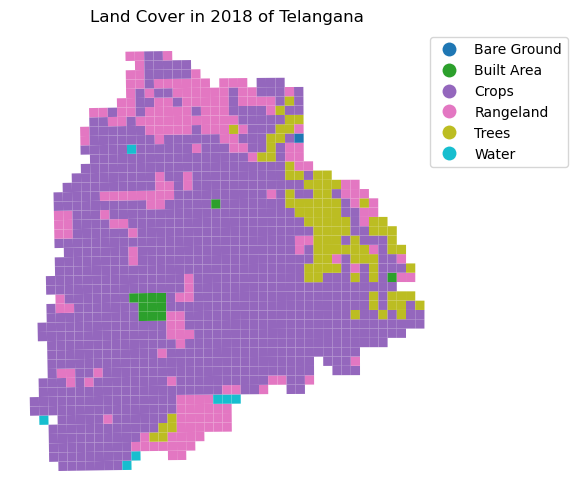

In [14]:

one_km_grid_geo = gpd.GeoDataFrame(ten_km_grid,geometry = ten_km_grid.geometry)#, crs = {'init': 'epsg:4326'}) 
fig, ax = plt.subplots(1, figsize = (12, 6))
one_km_grid_geo.plot(ax=ax, column = 'land use cat', legend = True)
plt.title('Land Cover in 2018 of Telangana')
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.1,0.8, 0.2, 0.2))
plt.axis('off')
plt.show()